In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [15]:
DATA_SET = pd.read_csv('./hrt.csv')
DATA_SET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
DATA_SET = pd.DataFrame(DATA_SET,columns = ['cp', 'ca', 'thal','age', 'chol', 'oldpeak', 'target'])
DATA_SET.head()

,cp,ca,thal,age,chol,oldpeak,target
0,3,0,1,63,233,2.3,1
1,2,0,2,37,250,3.5,1
2,1,0,2,41,204,1.4,1
3,1,0,2,56,236,0.8,1
4,0,0,2,57,354,0.6,1


In [17]:
DATA_SET = pd.get_dummies(DATA_SET, columns = ['cp', 'ca', 'thal'])
DATA_SET.head()

,age,chol,oldpeak,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,233,2.3,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,37,250,3.5,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,41,204,1.4,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,56,236,0.8,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,57,354,0.6,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [18]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'chol', 'oldpeak']
DATA_SET[columns_to_scale] = standardScaler.fit_transform(DATA_SET[columns_to_scale])
DATA_SET.head()

,age,chol,oldpeak,target,cp_0,cp_1,cp_2,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,-0.256334,1.087338,1,0,0,0,1,1,0,0,0,0,0,1,0,0
1,-1.915313,0.072199,2.122573,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.816773,0.310912,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,0.180175,-0.198357,-0.206705,1,0,1,0,0,1,0,0,0,0,0,0,1,0
4,0.290464,2.082050,-0.379244,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [19]:
Y = DATA_SET['target'].values
X = DATA_SET.drop(['target'], axis = 1).values

In [20]:
def get_score(model):
    ssplit=ShuffleSplit(n_splits=10,test_size=0.25,random_state = 0)
    results=cross_val_score(model,X,Y,cv=ssplit)
    return np.mean(results)

## KNN - BAGGING

In [21]:
KNN_scores = []
for k in range(1,21,1):
    KNN_model = KNeighborsClassifier(n_neighbors = k)
    bagging_model = BaggingClassifier(KNN_model,random_state = 0) 
    KNN_scores.append(get_score(bagging_model)*100)

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

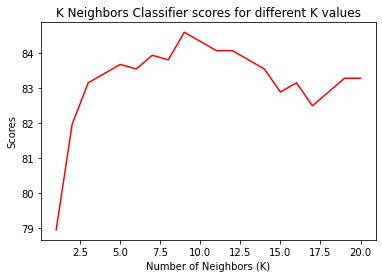

In [22]:
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
# for i in range(1,10):
#     plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
# plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [23]:
max_KNN_score  = -1
max_KNN_neigb = -1
for index, val in enumerate(KNN_scores):
    if(max_KNN_score < val):
        max_KNN_score = val
        max_KNN_neigb = index+1
max_KNN_neigb

9

In [24]:
KNN_model = KNeighborsClassifier(n_neighbors = max_KNN_neigb)
bagging_model = BaggingClassifier(KNN_model,random_state = 0) 
get_score(bagging_model)*100

84.60526315789473

## SVM - BAGGING

In [25]:
SVM_scores = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    model_SVM = SVC(kernel = kernels[i])
    bagging_model = BaggingClassifier(model_SVM,random_state = 0) 
    SVM_scores[kernels[i]] = (get_score(bagging_model))
SVM_scores

{'linear': 0.844736842105263,
 'poly': 0.8315789473684211,
 'rbf': 0.8368421052631578,
 'sigmoid': 0.8223684210526315}

In [26]:
model_SVM = SVC(kernel = 'linear')
bagging_model = BaggingClassifier(model_SVM,random_state = 0)
get_score(bagging_model) * 100

84.4736842105263

## DT - BAGGING

In [27]:
DT_scores = []
for i in range(1, len(DATA_SET.columns)):
    model_DT = DecisionTreeClassifier(max_features = i, random_state = 0)
    bagging_model = BaggingClassifier(model_DT,random_state = 0) 
    DT_scores.append(get_score(bagging_model))
DT_scores

[0.8065789473684211,
 0.8105263157894737,
 0.8197368421052632,
 0.8171052631578947,
 0.8092105263157896,
 0.8065789473684211,
 0.8052631578947368,
 0.8078947368421053,
 0.8118421052631579,
 0.7947368421052632,
 0.8,
 0.8065789473684211,
 0.8092105263157894,
 0.8144736842105263,
 0.7894736842105263,
 0.8]

Text(0.5, 1.0, 'DT Classifier Accuracy for different Max Features')

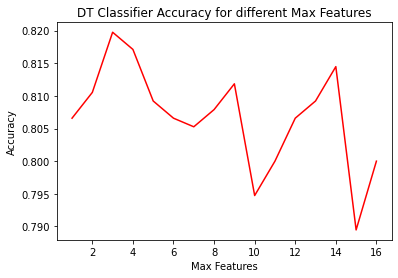

In [28]:
plt.plot([k for k in range(1, len(DATA_SET.columns))], DT_scores, color = 'red')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('DT Classifier Accuracy for different Max Features')

In [29]:
max_DT_score  = -1
max_feature = -1
for index, val in enumerate(DT_scores):
    if(max_DT_score < val):
        max_DT_score = val
        max_feature = index + 1
max_feature

3

In [30]:
model_DT = DecisionTreeClassifier(max_features = max_feature, random_state = 0)
bagging_model = BaggingClassifier(model_DT,random_state = 0) 
get_score(bagging_model)*100

81.97368421052632

## RF - BAGGING

In [31]:
model_RF = RandomForestClassifier(n_estimators = 100, random_state = 0)
bagging_model = BaggingClassifier(model_RF, random_state = 0) 
(get_score(bagging_model)*100)

83.42105263157895

## Naive Bayes - BAGGING

In [32]:
model_NB = GaussianNB()
bagging_model = BaggingClassifier(model_NB, random_state = 0) 
(get_score(bagging_model)*100)

75.52631578947368